In [1]:
!date

Tue Jul  4 14:08:59 EDT 2023


In [2]:
pwd

'/mmfs1/data/aglinska/BC-actionpred-seg/twostream_feafa'

In [3]:
import torch
from torch.nn import functional as F
from torch import nn
from typing import Union
import numpy as np
from math import exp
import os
from os import listdir
from os.path import isfile, join
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
from torchvision import models
import torch.optim as optim
import gc

from importlib import reload

import feafa_utils
import feafa_dataloader
import feafa_architecture
import feafa_criterion

reload(feafa_utils)
reload(feafa_dataloader)
reload(feafa_architecture)
reload(feafa_criterion)

<module 'feafa_criterion' from '/mmfs1/data/aglinska/BC-actionpred-seg/twostream_feafa/feafa_criterion.py'>

In [4]:
from matplotlib import pyplot as plt
from tqdm import tqdm

In [5]:
def safe_mkdir(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [7]:
# # no lbls
# path = '/data/aglinska/BC-actionpred-seg/Data/pytorch-data/xl_121_15_action_data_orig/train/'
# window = 11
# traindataset = feafa_dataloader.FeafaDataset(path,window,usage='Train')
# trainloader = DataLoader(traindataset,batch_size = 32)
# len(trainloader)

In [8]:
# lbls?
path = '/data/aglinska/BC-actionpred-seg/Data/pytorch-data/xl_121_15_action_data_orig/train/'
window = 11
traindataset = feafa_dataloader.FeafaDataset(path,window,usage='Train',return_labels=True)
trainloader = DataLoader(traindataset,batch_size = 32)
len(trainloader)

2340

In [13]:
torch.load(save_root)['loss']

0.013489525449167714

In [9]:
# Load network and reconstuctor
save_root = "/data/aglinska/BC-actionpred-seg/Data/02-results_twostream_feafa/epoch00005.ckp"
flownet = feafa_architecture.TinyMotionNet()
flownet.load_state_dict(torch.load(save_root)['model_state_dict'])
reconstructor = feafa_utils.Reconstructor()

In [11]:
i = 0
sample = traindataset.__getitem__(index=i,return_labels=True)

frames = sample['frames']
labels = sample['labels']

frames = frames[np.newaxis,:,:,:,:]
pred = flownet(frames)

t0s, reconstructed, flows_reshaped = reconstructor(frames.cuda(),[val.cuda() for val in pred])


In [27]:
sample = traindataset.__getitem__(index=1,return_labels=True)

frames = sample['frames']
labels = sample['labels']
labels

[('add_new_car_tire', '002_001.jpg'),
 ('add_new_car_tire', '002_002.jpg'),
 ('add_new_car_tire', '002_003.jpg'),
 ('add_new_car_tire', '002_004.jpg'),
 ('add_new_car_tire', '002_005.jpg'),
 ('add_new_car_tire', '002_006.jpg'),
 ('add_new_car_tire', '002_007.jpg'),
 ('add_new_car_tire', '002_008.jpg'),
 ('add_new_car_tire', '002_009.jpg'),
 ('add_new_car_tire', '002_010.jpg'),
 ('add_new_car_tire', '002_011.jpg')]

In [15]:
frames.shape

torch.Size([1, 3, 11, 224, 224])

In [17]:
[print(val.shape) for val in pred];

torch.Size([1, 20, 224, 224])
torch.Size([1, 20, 112, 112])
torch.Size([1, 20, 56, 56])
torch.Size([1, 20, 28, 28])


In [22]:
flows_reshaped[0].shape

torch.Size([10, 2, 224, 224])

In [18]:
# # Prep save dir
# out_dir = '~/BC-actionpred-seg/Data/pytorch-data/flows/train'
# out_dir = os.path.expanduser(out_dir)
# safe_mkdir(out_dir)

In [10]:
# for i in tqdm( range(len(traindataset)) ):
#     sample = traindataset.__getitem__(index=i,return_labels=True)

#     frames = sample['frames']
#     labels = sample['labels']

#     frames = frames[np.newaxis,:,:,:,:]
#     pred = flownet(frames)

#     t0s, reconstructed, flows_reshaped = reconstructor(frames.cuda(),[val.cuda() for val in pred])

#     safe_mkdir(os.path.join(out_dir,labels[0][0]))

#     flows_out = flows_reshaped[0] # 10x2x224x244
#     flows_out = flows_out.cpu().detach().numpy()[0,:,:,:] #10x2x224x244

#     out_fn = os.path.join(out_dir,labels[0][0],labels[0][1].replace('.jpg','.npy'))

#     np.save(file=out_fn, arr=flows_out)

In [10]:
sample = traindataset.__getitem__(5000)

In [11]:
frames = sample['frames']
labels = sample['labels']
labels

0

In [12]:
pred = flownet(frames[np.newaxis,:,:,:,:])

(-0.5, 223.5, 223.5, -0.5)

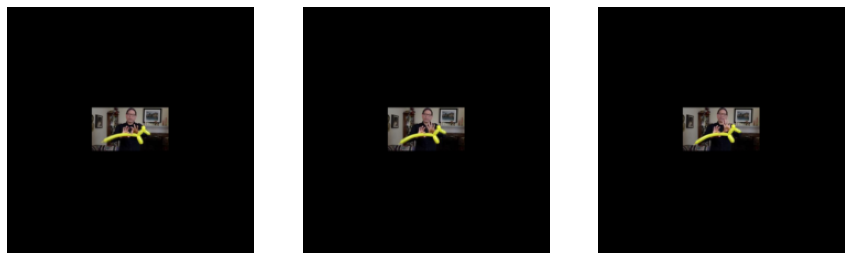

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(frames[:,0,:,:].detach().numpy().swapaxes(0,1).swapaxes(1,2))
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(frames[:,5,:,:].detach().numpy().swapaxes(0,1).swapaxes(1,2))
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(frames[:,10,:,:].detach().numpy().swapaxes(0,1).swapaxes(1,2))
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

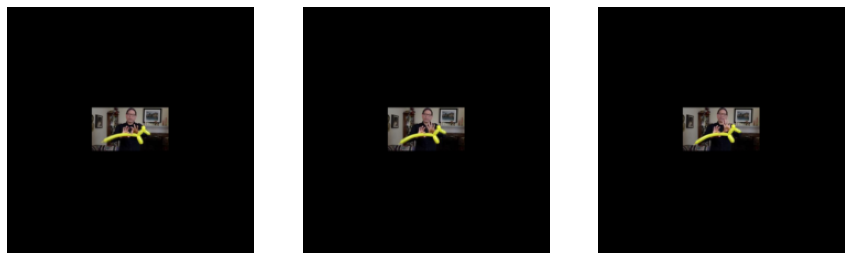

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(frames[:,0,:,:].detach().numpy().swapaxes(0,1).swapaxes(1,2))
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(frames[:,5,:,:].detach().numpy().swapaxes(0,1).swapaxes(1,2))
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(frames[:,10,:,:].detach().numpy().swapaxes(0,1).swapaxes(1,2))
plt.axis('off')

In [15]:
print(pred[0].detach().numpy().shape)
print(pred[1].detach().numpy().shape)
print(pred[2].detach().numpy().shape)
print(pred[3].detach().numpy().shape)

(1, 20, 224, 224)
(1, 20, 112, 112)
(1, 20, 56, 56)
(1, 20, 28, 28)


In [16]:
reconstructor = feafa_utils.Reconstructor()


In [17]:
frames2 = frames[np.newaxis,:,:,:,:]
frames2 = frames2.cuda()

In [18]:
t0s, reconstructed, flows_reshaped = reconstructor(frames2,[val.cuda() for val in pred])

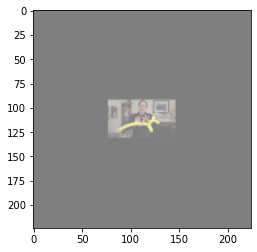

In [19]:
plt.imshow(reconstructed[0].cpu().detach().numpy()[0,:,:,:].swapaxes(0,1).swapaxes(1,2))

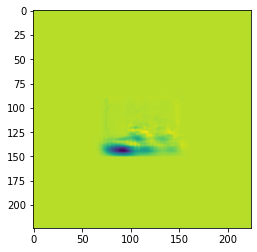

In [20]:
plt.imshow(flows_reshaped[0][0,0,:,:].detach().cpu())

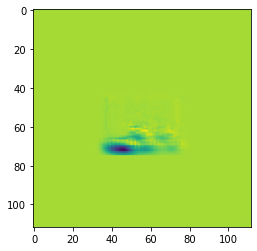

In [21]:
plt.imshow(flows_reshaped[1][0,0,:,:].detach().cpu())